In [5]:
%pylab inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.font_manager import FontProperties
import collections

Populating the interactive namespace from numpy and matplotlib


In [14]:
df = pd.read_csv('/home/cmb-panasas2/wenzhenl/benchmark/exon_level/hg38/SRP098789_human/ROC_input.txt', sep='\t', index_col='name')

In [17]:
df = df[df['truth'] == 1]

In [19]:
df.index = df.index.str.replace('_ribo', '')

In [21]:
df = df[['ribotaper', 'ORFscore', 'ribocode', 'ribocop']]

In [22]:
df

,ribotaper,ORFscore,ribocode,ribocop
name,,,,
chr1_100007033_100007156_CCDS_ENSG00000117620.13,2.144654e-01,2.471306,3.115318e-02,0.625000
chr1_100015301_100015420_CCDS_ENSG00000117620.13,8.192856e-03,4.423682,5.431687e-03,0.989617
chr1_100017681_100017815_CCDS_ENSG00000117620.13,4.387825e-03,5.351140,5.396612e-04,0.596131
chr1_100022385_100022473_CCDS_ENSG00000117620.13,4.141785e-02,4.666757,1.838905e-03,0.607944
chr1_100059877_100060005_CCDS_ENSG00000156875.13,8.146319e-02,3.549162,2.543396e-02,0.730224
chr1_100067976_100068195_CCDS_ENSG00000156875.13,1.040851e-02,4.575440,5.877479e-04,0.854400
chr1_100080495_100080659_CCDS_ENSG00000156875.13,2.239939e-02,4.226068,1.076197e-03,0.795395
chr1_100082002_100082206_CCDS_ENSG00000156875.13,1.660527e-01,4.192645,2.518410e-03,0.625000
chr1_100085330_100085434_CCDS_ENSG00000156876.9,2.887418e-02,4.491853,2.051384e-03,0.791024


In [23]:
result_ccds = pd.read_csv('/home/cmb-panasas2/wenzhenl/benchmark/exon_level/hg38/SRP098789_human/results_ccds', sep='\t', index_col='exon_id')

In [25]:
result_ccds = result_ccds[['length.x', 'reads_ribo']]

In [26]:
result_ccds

,length.x,reads_ribo
exon_id,,
chr1_100007033_100007156_CCDS_ENSG00000117620.13,123,52
chr1_100011364_100011533_CCDS_ENSG00000117620.13,169,59
chr1_100015301_100015420_CCDS_ENSG00000117620.13,119,41
chr1_100017681_100017815_CCDS_ENSG00000117620.13,134,69
chr1_100022385_100022411_CCDS_ENSG00000117620.13,26,26
chr1_100022385_100022473_CCDS_ENSG00000117620.13,88,72
chr1_100038232_100038316_CCDS_ENSG00000156875.13,84,19
chr1_100049908_100050004_CCDS_ENSG00000156875.13,96,13
chr1_100058665_100058728_CCDS_ENSG00000156875.13,63,6


In [32]:
code_df = pd.read_csv('/home/cmb-panasas2/wenzhenl/benchmark/exon_level/hg38/SRP098789_human/ribocode_result.txt', sep='\t', index_col='ID')

In [33]:
code_df = code_df[['ribo_cov']]

In [34]:
code_df

,ribo_cov
ID,
chr17_37687374_37687392_CCDS_ENSG00000275410.4,0.333333
chr7_6024675_6024801_CCDS_ENSG00000086232.12,0.285714
chr11_66639711_66640123_CCDS_ENSG00000173933.19,0.489051
chr10_63206594_63208801_CCDS_ENSG00000171988.17,0.023129
chr4_140400356_140400549_CCDS_ENSG00000153132.12,0.296875
chr15_80160409_80160459_CCDS_ENSG00000103876.11,0.562500
chr14_23094974_23095286_CCDS_ENSG00000100813.14,0.067308
chr17_58734117_58734219_CCDS_ENSG00000108384.14,0.205882
chr1_29230730_29230906_CCDS_ENSG00000116353.15,0.172414


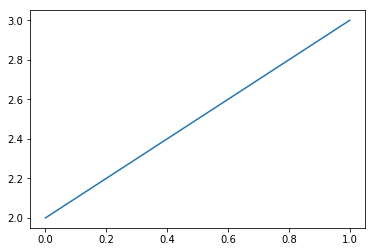

In [6]:
plt.plot([0, 1], [2, 3])

In [36]:
merged = df.merge(result_ccds, left_index=True, right_index=True)

In [38]:
merged = merged.merge(code_df, left_index=True, right_index=True)

In [41]:
52/123.0

0.42276422764227645

In [39]:
merged

,ribotaper,ORFscore,ribocode,ribocop,length.x,reads_ribo,ribo_cov
chr1_100007033_100007156_CCDS_ENSG00000117620.13,2.144654e-01,2.471306,3.115318e-02,0.625000,123,52,0.146341
chr1_100015301_100015420_CCDS_ENSG00000117620.13,8.192856e-03,4.423682,5.431687e-03,0.989617,119,41,0.102564
chr1_100017681_100017815_CCDS_ENSG00000117620.13,4.387825e-03,5.351140,5.396612e-04,0.596131,134,69,0.181818
chr1_100022385_100022473_CCDS_ENSG00000117620.13,4.141785e-02,4.666757,1.838905e-03,0.607944,88,72,0.275862
chr1_100059877_100060005_CCDS_ENSG00000156875.13,8.146319e-02,3.549162,2.543396e-02,0.730224,128,21,0.119048
chr1_100067976_100068195_CCDS_ENSG00000156875.13,1.040851e-02,4.575440,5.877479e-04,0.854400,219,37,0.123288
chr1_100080495_100080659_CCDS_ENSG00000156875.13,2.239939e-02,4.226068,1.076197e-03,0.795395,164,29,0.111111
chr1_100082002_100082206_CCDS_ENSG00000156875.13,1.660527e-01,4.192645,2.518410e-03,0.625000,204,46,0.088235
chr1_100085330_100085434_CCDS_ENSG00000156876.9,2.887418e-02,4.491853,2.051384e-03,0.791024,104,33,0.176471
chr1_100088138_100088236_CCDS_ENSG00000156876.9,5.644936e-01,1.459432,1.593911e-01,0.346410,98,16,0.093750


In [42]:
merged[:5]

,ribotaper,ORFscore,ribocode,ribocop,length.x,reads_ribo,ribo_cov
chr1_100007033_100007156_CCDS_ENSG00000117620.13,0.214465,2.471306,0.031153,0.625000,123,52,0.146341
chr1_100015301_100015420_CCDS_ENSG00000117620.13,0.008193,4.423682,0.005432,0.989617,119,41,0.102564
chr1_100017681_100017815_CCDS_ENSG00000117620.13,0.004388,5.351140,0.000540,0.596131,134,69,0.181818
chr1_100022385_100022473_CCDS_ENSG00000117620.13,0.041418,4.666757,0.001839,0.607944,88,72,0.275862
chr1_100059877_100060005_CCDS_ENSG00000156875.13,0.081463,3.549162,0.025434,0.730224,128,21,0.119048


In [43]:
import seaborn as sns

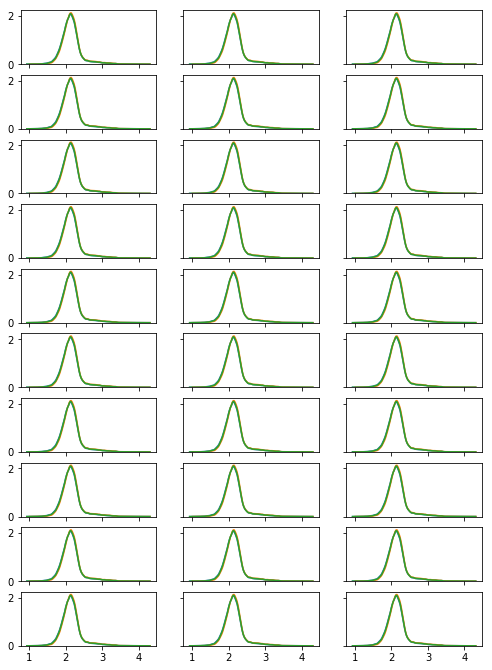

In [71]:
fig, axes = plt.subplots(10,3, sharex=True, sharey=True)
fig.set_size_inches(8.27, 11.69)
for i in range(10):
    for j in range(3):
        sns.distplot(np.log10(merged['length.x'].values), kde=True, hist=False, ax=axes[i][j])
        sns.distplot(np.log10(merged[merged['ribotaper'] < 0.05]['length.x'].values), kde=True, hist=False, ax=axes[i][j])
        sns.distplot(np.log10(merged[merged['ribocode'] < 0.05]['length.x'].values), kde=True, hist=False, ax=axes[i][j])
fig.savefig('results/practise.pdf')

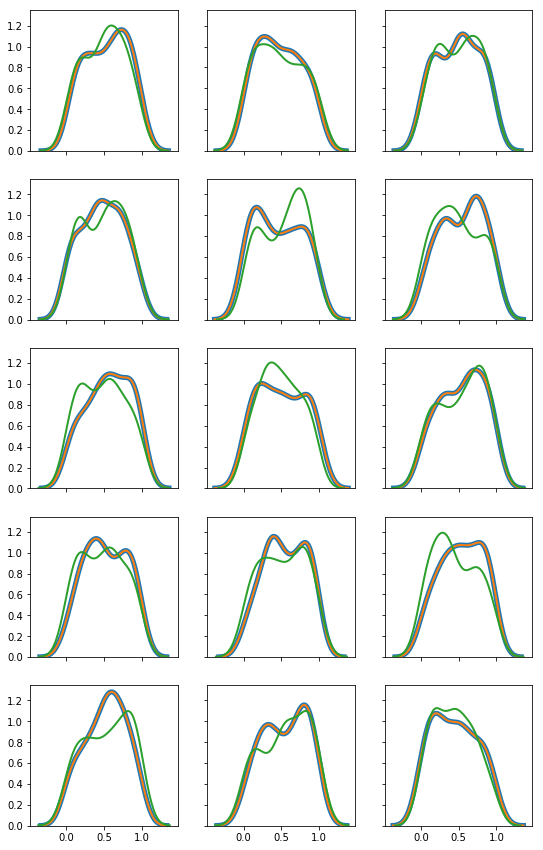

In [76]:
fig, axes = plt.subplots(5,3, sharex=True, sharey=True)
fig.set_size_inches(9, 15)
for i in range(5):
    for j in range(3):
        xx = np.random.rand(100)
        yy = np.random.rand(100)
        sns.distplot(xx, kde=True, hist=False, ax=axes[i][j], kde_kws={'linewidth': 5})
        sns.distplot(xx, kde=True, hist=False, ax=axes[i][j], kde_kws={'linewidth': 2})
        sns.distplot(yy, kde=True, hist=False, ax=axes[i][j], kde_kws={'linewidth': 2})
fig.savefig('results/practise.pdf')